In [9]:
import nltk
import pandas as pd
import sklearn
import re  
from sklearn.feature_extraction.text import CountVectorizer
import csv

In [10]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
## For Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import os

import string
import numpy as np


In [11]:
from sklearn.naive_bayes import MultinomialNB

MyModelNB= MultinomialNB()
## When you look up this model, you learn that it wants the 
## !!! DF separate from the labels  !!!

# MyModelNB.fit(TrainDF_nolabels, TrainLabels)
# Prediction = MyModelNB.predict(TestDF)

# ## confusion matrix
# from sklearn.metrics import confusion_matrix
# cnf_matrix = confusion_matrix(TestLabels, Prediction)
# print("\nThe confusion matrix is:")
# print(cnf_matrix)
# print(np.round(MyModelNB.predict_proba(TestDF),2))


In [12]:
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, ENGLISH_STOP_WORDS

# Function to read text files from a folder and assign labels
def read_files_and_assign_labels(folder, label):
    file_list = []
    label_list = []
    
    for filename in os.listdir(folder):
        if filename.endswith(".txt"):
            file_path = os.path.join(folder, filename)
            with open(file_path, 'r', encoding='utf-8') as file:
                content = file.read()
                file_list.append(content)
                label_list.append(label)
    
    return pd.DataFrame({'Review': file_list, 'Label': label_list})

# Path to the folders
neg_folder = "/Users/gozi/Desktop/text mining/Homework 7/neg"
pos_folder = "/Users/gozi/Desktop/text mining/Homework 7/pos"

# Read and label negative reviews
neg_df = read_files_and_assign_labels(neg_folder, label='neg')

# Read and label positive reviews
pos_df = read_files_and_assign_labels(pos_folder, label='pos')

# Concatenate the DataFrames
combined_df = pd.concat([neg_df, pos_df], ignore_index=True)

In [13]:
combined_df = combined_df.apply(lambda col: col.str.replace('<br />', '') if col.dtype == 'O' else col)


In [14]:
combined_df.to_csv("combineddf.csv", index=False)


In [15]:

filename = "combineddf.csv"  

reviews = []
sentimentlist = []

with open(filename, 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    
    next(csv_reader)

    
    for row in csv_reader:
        review, sentiment = row[0], row[1]
        reviews.append(review)
        sentimentlist.append(sentiment)


print("Reviews:", reviews)
print("sentiment",sentimentlist)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [16]:
vectorizer=CountVectorizer(input='content',
                        stop_words='english',
                        max_features=100)


X = vectorizer.fit_transform(reviews)
ColNames = vectorizer.get_feature_names_out()
df_vector=pd.DataFrame(X.toarray(), columns=ColNames)


In [17]:
df_vector.head()

,10,acting,action,actors,actually,away,bad,best,better,big,...,want,watch,watching,way,woman,work,world,worst,years,young
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,2,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,2,0,1,0,0,0,0
3,1,0,0,0,0,0,0,2,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [18]:
df_vector.to_csv("vector.csv", index=False)


In [19]:
ColNames

array(['10', 'acting', 'action', 'actors', 'actually', 'away', 'bad',
       'best', 'better', 'big', 'bit', 'cast', 'character', 'characters',
       'come', 'comedy', 'day', 'did', 'didn', 'director', 'does',
       'doesn', 'don', 'end', 'fact', 'family', 'far', 'feel', 'film',
       'films', 'funny', 'gets', 'girl', 'going', 'good', 'got', 'great',
       'guy', 'horror', 'interesting', 'isn', 'just', 'kind', 'know',
       'life', 'like', 'little', 'll', 'long', 'look', 'lot', 'love',
       'make', 'makes', 'making', 'man', 'minutes', 'movie', 'movies',
       'music', 'new', 'old', 'original', 'people', 'performance', 'plot',
       'point', 'pretty', 'probably', 'quite', 'real', 'really', 'right',
       'role', 'saw', 'say', 'scene', 'scenes', 'script', 'seen',
       'series', 'story', 'thing', 'things', 'think', 'thought', 'time',
       'times', 'tv', 've', 'want', 'watch', 'watching', 'way', 'woman',
       'work', 'world', 'worst', 'years', 'young'], dtype=object)

In [20]:
print(vectorizer.vocabulary_)


{'best': 7, 'film': 28, 'cast': 11, 'good': 34, 'original': 62, 'movie': 57, 'quite': 69, 'watch': 91, 'make': 52, 'movies': 58, 'going': 33, 'right': 72, 'bad': 6, 'fact': 24, 'little': 46, 'girl': 32, 'tv': 88, 'did': 17, 'really': 71, 'think': 84, 'people': 63, 'better': 8, 'things': 83, 'bit': 10, 'does': 20, 'way': 93, 'know': 43, 'actors': 3, 'script': 78, 'director': 19, 'characters': 13, 'work': 95, 'didn': 18, 'away': 5, 've': 89, 'seen': 79, 'life': 44, 'worst': 97, 'isn': 40, 'minutes': 56, 'end': 23, 'big': 9, 'scene': 76, 'just': 41, 'times': 87, 'new': 60, '10': 0, 'action': 2, 'like': 45, 'makes': 53, 'performance': 64, 'role': 73, 'character': 12, 'point': 66, 'guy': 37, 'look': 49, 'don': 22, 'long': 48, 'time': 86, 'thing': 82, 'horror': 38, 'real': 70, 'world': 96, 'story': 81, 'kind': 42, 'watching': 92, 'man': 55, 'got': 35, 'lot': 50, 'far': 26, 'plot': 65, 'acting': 1, 'music': 59, 'actually': 4, 'll': 47, 'thought': 85, 'young': 99, 'pretty': 67, 'saw': 74, 'fee

In [21]:
def Logical_Numbers_Present(anyString):
    return any(char.isdigit() for char in anyString)
##----------------------------------------------------

for nextcol in df_vector.columns:
    #print(nextcol)
    ## Remove unwanted columns
    #Result=str.isdigit(nextcol) ## Fast way to check numbers
    #print(Result)
    
    ##-------------call the function -------
    LogResult=Logical_Numbers_Present(nextcol)
    ## The above returns a logical of True or False
    
    ## The following will remove all columns that contains numbers
    if(LogResult==True):
        #print(LogResult)
        #print(nextcol)
        df_vector=df_vector.drop([nextcol], axis=1)

    ## The following will remove any column with name
    ## of 3 or smaller - like "it" or "of" or "pre".
    ##print(len(nextcol))  ## check it first
    ## NOTE: You can also use this code to CONTROL
    ## the words in the columns. For example - you can
    ## have only words between lengths 5 and 9. 
    ## In this case, we remove columns with words <= 3.
    elif(len(str(nextcol))<=3):
        print(nextcol)
        df_vector=df_vector.drop([nextcol], axis=1)
    
    
print(df_vector)

bad
big
bit
day
did
don
end
far
got
guy
isn
ll
lot
man
new
old
saw
say
tv
ve
way
       acting  action  actors  actually  away  best  better  cast  character  \
0           0       0       0         0     0     1       0     1          0   
1           0       0       0         0     0     0       1     0          0   
2           0       0       1         0     1     0       0     0          0   
3           0       0       0         0     0     2       0     1          0   
4           0       1       0         0     1     0       0     0          1   
...       ...     ...     ...       ...   ...   ...     ...   ...        ...   
24995       0       0       0         0     0     2       0     0          0   
24996       0       0       0         0     0     0       0     0          0   
24997       1       0       0         0     0     0       0     0          0   
24998       1       0       0         0     0     0       0     1          0   
24999       0       0       0         0

In [22]:
df_vector.head()

,acting,action,actors,actually,away,best,better,cast,character,characters,...,times,want,watch,watching,woman,work,world,worst,years,young
0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,2,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,1,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0


In [23]:

df_sentiment = df_vector

In [24]:
df_sentiment = df_sentiment.drop(columns='LABEL', errors='ignore')

df_sentiment.insert(loc=0, column='LABEL', value=sentimentlist)


In [25]:
df_sentiment.head()

,LABEL,acting,action,actors,actually,away,best,better,cast,character,...,times,want,watch,watching,woman,work,world,worst,years,young
0,neg,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,neg,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,neg,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,neg,0,0,0,0,0,2,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,neg,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


# Model for testing sentiment dataset

In [44]:
from sklearn.model_selection import train_test_split
import random as rd
#rd.seed(1234)
TrainSVM, TestSVM = train_test_split(df_sentiment, test_size=0.3)
print(TrainSVN)
print(TestSVM)

      LABEL  acting  action  actors  actually  away  best  better  cast  \
23526   pos       1       0       0         4     1     0       0     0   
1689    neg       0       0       0         0     0     0       0     0   
17297   pos       0       0       0         0     1     4       0     1   
11129   neg       1       0       0         0     0     0       0     0   
15506   pos       0       0       0         0     0     1       0     0   
...     ...     ...     ...     ...       ...   ...   ...     ...   ...   
14404   pos       1       2       0         0     0     0       0     0   
17355   pos       0       0       0         1     0     0       1     0   
1833    neg       0       0       0         0     0     0       0     0   
19636   pos       0       0       0         1     0     2       0     0   
24814   pos       1       0       0         0     0     0       0     0   

       character  ...  times  want  watch  watching  woman  work  world  \
23526          1  ...   

In [45]:
TestSVMLabels=TestSVM["LABEL"]
print(TestSVMLabels)

TestSVM = TestSVM.drop(["LABEL"], axis=1) #remove the entire column

12798    pos
10371    neg
23543    pos
18163    pos
18770    pos
        ... 
239      neg
15137    pos
7641     neg
24072    pos
15572    pos
Name: LABEL, Length: 7500, dtype: object


In [46]:
TrainSVMLabels=TrainSVM["LABEL"]
print(TrainSVMLabels)

TrainSVM = TrainSVM.drop(["LABEL"], axis=1)
print(TrainSVM)

664      neg
15384    pos
2967     neg
9779     neg
22527    pos
        ... 
6032     neg
6392     neg
15746    pos
5084     neg
869      neg
Name: LABEL, Length: 17500, dtype: object
       acting  action  actors  actually  away  best  better  cast  character  \
664         4       0       2         2     0     0       0     0          0   
15384       0       0       0         1     0     0       0     0          1   
2967        0       0       0         0     0     0       0     0          0   
9779        0       2       0         0     0     0       0     1          0   
22527       0       0       0         0     0     0       0     0          0   
...       ...     ...     ...       ...   ...   ...     ...   ...        ...   
6032        0       0       1         0     0     0       2     0          0   
6392        0       0       0         0     0     0       0     0          0   
15746       0       0       0         0     0     0       0     0          0   
5084        0  

In [50]:
from sklearn.svm import LinearSVC
SVM_Model=LinearSVC(C=1)

SVM_Model.fit(TrainSVM, TrainSVMLabels)

print("SVM prediction:\n", SVM_Model.predict(TestSVM))
print("Actual:")
print(TestSVMLabels)
from sklearn.metrics import confusion_matrix

Prediction = SVM_Model.predict(TestSVM)
SVM_matrix = confusion_matrix(TestSVMLabels, SVM_Model.predict(TestSVM))
print("\nThe confusion matrix is:")
print(SVM_matrix)
print("\n\n")

SVM prediction:
 ['pos' 'pos' 'pos' ... 'neg' 'pos' 'pos']
Actual:
12798    pos
10371    neg
23543    pos
18163    pos
18770    pos
        ... 
239      neg
15137    pos
7641     neg
24072    pos
15572    pos
Name: LABEL, Length: 7500, dtype: object

The confusion matrix is:
[[2605 1153]
 [ 974 2768]]





/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [48]:

from sklearn.metrics import accuracy_score


print(accuracy_score(TestSVMLabels, Prediction))

0.7162666666666667


In [49]:
SVM_Model2=sklearn.svm.SVC(C=1, kernel='rbf', 
                           verbose=True, gamma="auto")

SVM_Model2.fit(TrainSVM, TrainSVMLabels)

print("SVM prediction:\n", SVM_Model2.predict(TestSVM))
print("Actual:")
print(TestSVMLabels)
from sklearn.metrics import confusion_matrix

Prediction1 = SVM_Model2.predict(TestSVM)
SVM_matrix1 = confusion_matrix(TestSVMLabels, SVM_Model2.predict(TestSVM))
print("\nThe confusion matrix is:")
print(SVM_matrix1)
print("\n\n")



[LibSVM].........*..*.*
optimization finished, #iter = 11711
obj = -10689.992437, rho = -0.037722
nSV = 12001, nBSV = 10957
Total nSV = 12001
SVM prediction:
 ['pos' 'neg' 'pos' ... 'neg' 'pos' 'pos']
Actual:
12798    pos
10371    neg
23543    pos
18163    pos
18770    pos
        ... 
239      neg
15137    pos
7641     neg
24072    pos
15572    pos
Name: LABEL, Length: 7500, dtype: object

The confusion matrix is:
[[2647 1111]
 [ 992 2750]]





In [51]:

from sklearn.metrics import accuracy_score


print(accuracy_score(TestSVMLabels, Prediction1))

0.7196


In [40]:

SVM_Model3=sklearn.svm.SVC(C=100, kernel='poly',degree=3,
                           gamma="auto", verbose=True)

SVM_Model3.fit(TrainSVM, TrainSVMLabels)

print("SVM prediction:\n", SVM_Model3.predict(TestSVM))
print("Actual:")
print(TestSVMLabels)
from sklearn.metrics import confusion_matrix

Prediction2 = SVM_Model3.predict(TestSVM)
SVM_matrix2 = confusion_matrix(TestSVMLabels, SVM_Model3.predict(TestSVM))
print("\nThe confusion matrix is:")
print(SVM_matrix2)
print("\n\n")

SVM prediction:
 ['neg' 'pos' 'neg' ... 'pos' 'pos' 'neg']
Actual:
6673     neg
23116    pos
21205    pos
18475    pos
6440     neg
        ... 
17816    pos
17514    pos
14053    pos
2280     neg
595      neg
Name: LABEL, Length: 7500, dtype: object

The confusion matrix is:
[[2301 1391]
 [1387 2421]]





/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [53]:
from sklearn.metrics import accuracy_score


print(accuracy_score(TestSVMLabels, Prediction2))

0.4996


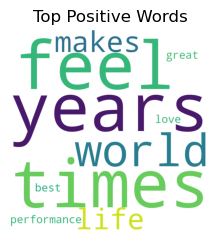

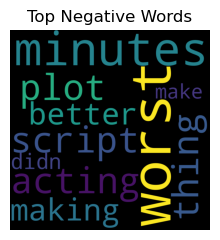

In [58]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

def generate_word_cloud(words, title, color='white'):
    wordcloud = WordCloud(width=800, height=800, background_color=color, min_font_size=10).generate(words)

    # Plot the WordCloud image
    plt.figure(figsize=(2, 2), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title(title)

    plt.show()

def plot_coefficients_word_cloud(MODEL=SVM_Model, COLNAMES=TrainDF1.columns, top_features=10):
    # Model if SVM MUST be SVC, RE: SVM_Model=LinearSVC(C=10)
    coef = MODEL.coef_.ravel()
    top_positive_coefficients = np.argsort(coef, axis=0)[-top_features:]
    top_negative_coefficients = np.argsort(coef, axis=0)[:top_features]

    # Extract top words based on coefficients
    positive_words = " ".join(COLNAMES[top_positive_coefficients])
    negative_words = " ".join(COLNAMES[top_negative_coefficients])

    # Generate word clouds for positive and negative coefficients
    generate_word_cloud(positive_words, title="Top Positive Words", color='white')
    generate_word_cloud(negative_words, title="Top Negative Words", color='black')

# Assuming you have a model (SVM_Model) and column names (TrainDF1.columns)
plot_coefficients_word_cloud()
